# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Credit Card Fraud Detection</p>

<p style="text-align:center; ">
<img src="https://www.eastwestbank.com/content/dam/ewb-dotcom/reachfurther/newsarticlestore/519/Credit-card-fraud-top.jpg" style='width: 650px; height: 350px;'>
</p>

# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Датасет и его структура</p>


**Название и путь датасета: ```./data/creditcard.csv```.**

Название признаков анонимизированны.


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Структура проекта (потенциальная)</p>

|No  | Contents                                                         |No  | Contents                                                      |
|:---|:-----------------------------------------------------------------|:---|:--------------------------------------------------------------|
|1   | [<font color="#682F2F"> Импорт необходимых библиотек</font>](#1) |7   | [<font color="#682F2F"> Углубленный EDA</font>](#7)           |
|2   | [<font color="#682F2F"> Информация о датасете</font>](#2)        |8   | [<font color="#682F2F"> Anomaly Detection</font>](#8)         |
|3   | [<font color="#682F2F"> Базовый EDA</font>](#3)                  |9  | [<font color="#682F2F"> Dimensionality Reduction?</font>](#9) |
|4   | [<font color="#682F2F"> Саммари по датасету</font>](#4)          |10  | [<font color="#682F2F"> Classification </font>](#10)          |
|5   | [<font color="#682F2F"> Data Preprocessing</font>](#5)           |11  | [<font color="#682F2F"> Testing </font>](#11)                 |
|6   | [<font color="#682F2F"> Визуальный анализ и выводы</font>](#6)   |12  | [<font color="#682F2F"> Summary</font>](#12)                  |

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Импорт библиотек для проекта</p>

In [1]:
# HINT!
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Базовый EDA и знакомство с датасетом</p>

In [29]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30)

tsne_transformed = tsne.fit_transform(data[:10000])

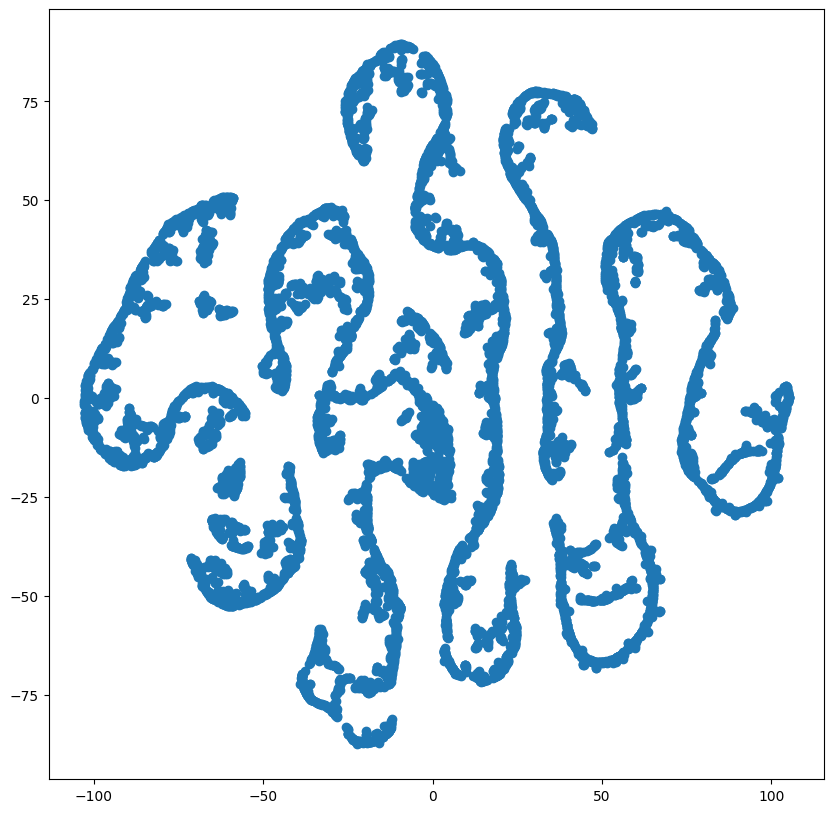

In [30]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1]);

In [2]:
from utils import read_data
from utils import print_basic_statistics


data = read_data('./data/creditcard.csv')

print_basic_statistics(data, 'Class')

Shape = (284807, 31)

Columns = ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']

First 15 samples:
    Time        V1        V2        V3        V4        V5        V6        V7        V8        V9  ...       V21       V22       V23       V24       V25       V26       V27       V28  Amount  Class
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62      0
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69      0
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

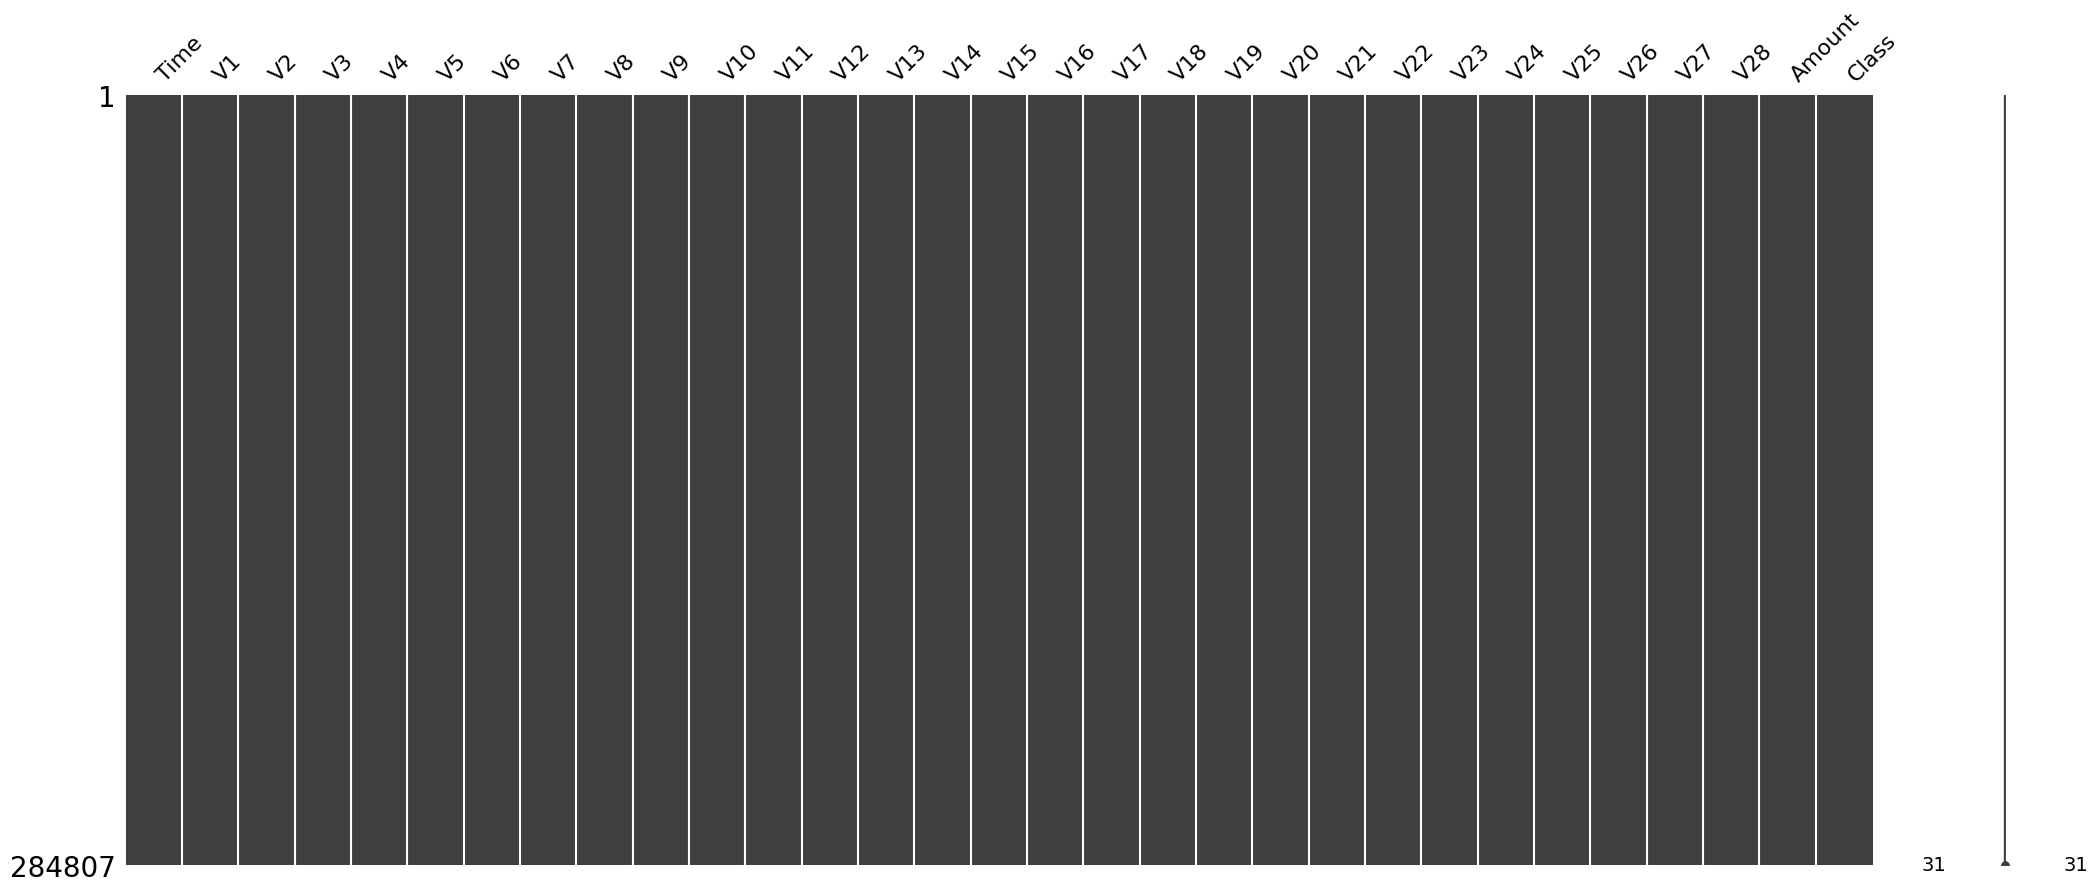

<Figure size 1500x900 with 0 Axes>

In [3]:
from utils import show_data_missings

show_data_missings(data)

In [4]:
from utils import corr_feature_detect


corr = corr_feature_detect(data=data, threshold=0.4)

print('Top correlations:\n')
for i in corr:
    print(i, '\n')

Top correlations:

  feature1 feature2      corr
0   Amount       V2  0.531409 

  feature1 feature2      corr
1       V2   Amount  0.531409 

  feature1 feature2      corr
2     Time       V3  0.419618 

  feature1 feature2      corr
3       V3     Time  0.419618 



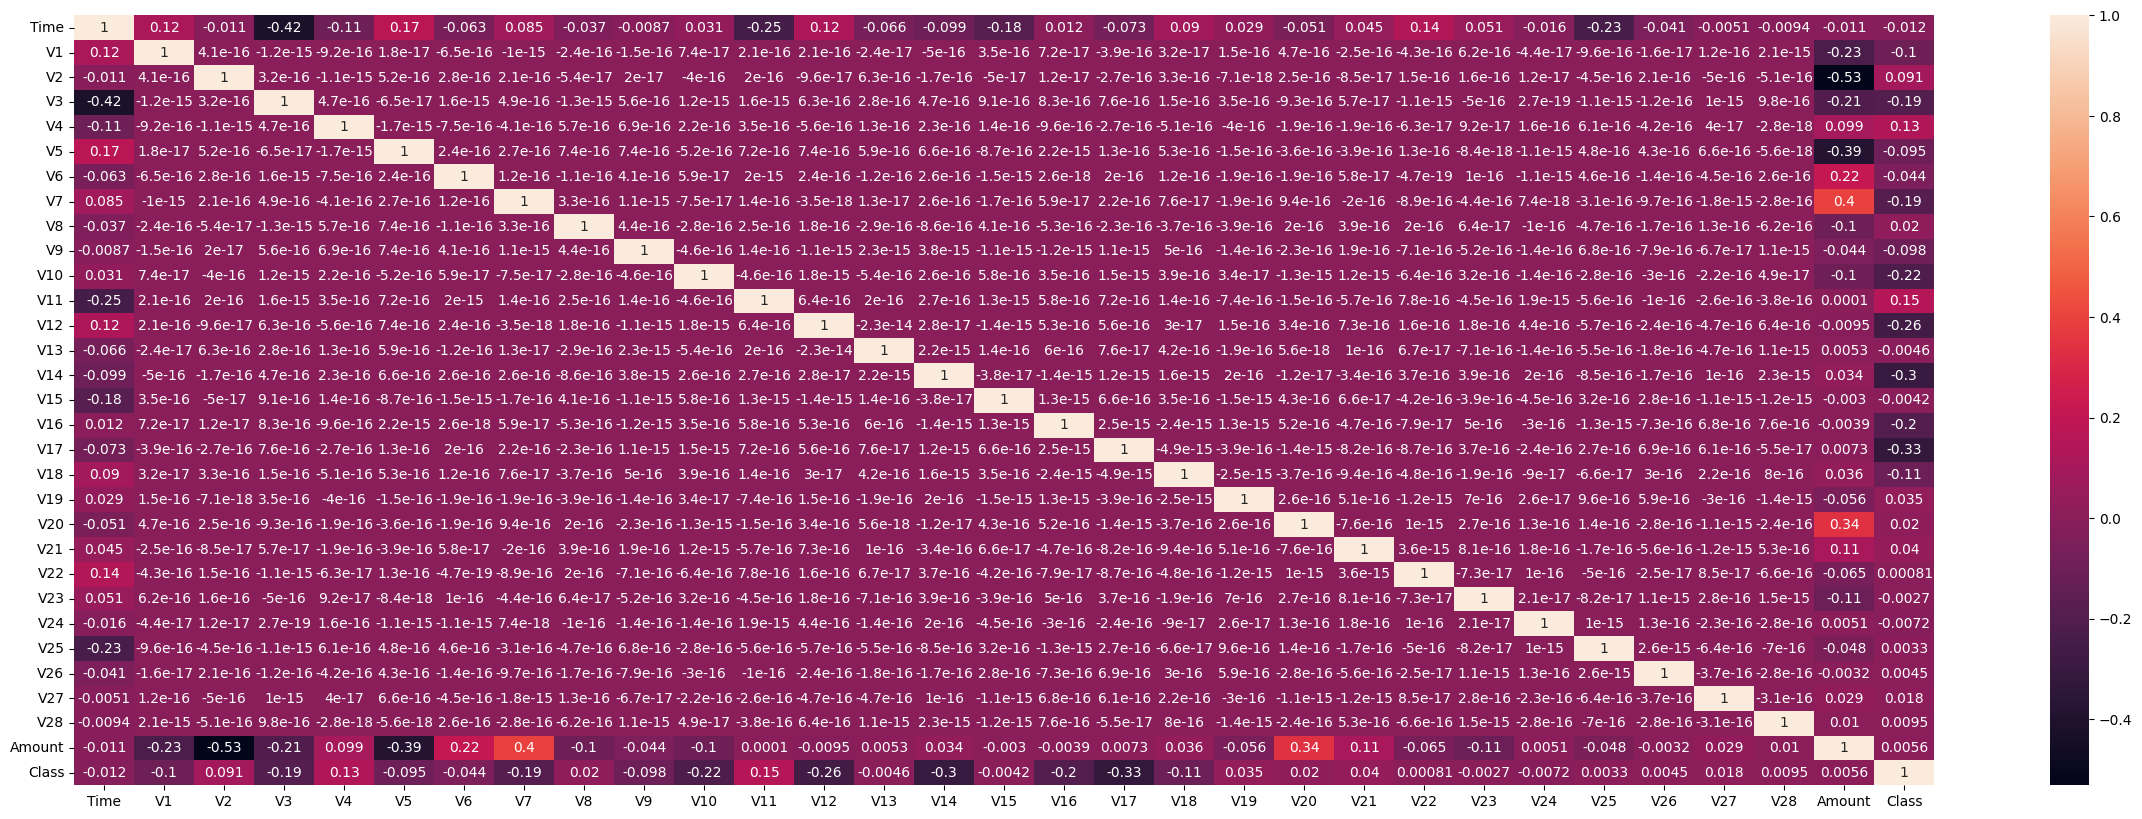

In [5]:
from utils import plot_corr_matrix


plot_corr_matrix(data, figsize=(30, 10))

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Углубленный EDA</p>

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
data_copy = data.copy()

data_copy['Time'] = np.log10(data['Time'])

<Axes: xlabel='Time', ylabel='Count'>

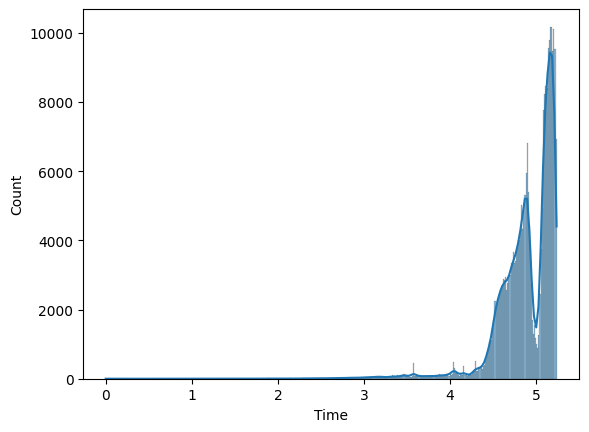

In [35]:
sns.histplot(data=data_copy, x='Time', kde=True)

In [22]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859582,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145941,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,1.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [21]:
data.loc[data['Time'] == 0, 'Time'] = 1

In [23]:
from scipy import stats

# Применение преобразования Бокса-Кокса к признаку 'feature' в DataFrame 'df'
transformed_feature, lambda_value = stats.boxcox(data['Time'])

# Вывод значения параметра lambda, которое используется для преобразования
print("Lambda value:", lambda_value)

# Создание нового столбца с преобразованным признаком
data_copy['Time'] = transformed_feature

Lambda value: 0.7701909785951683


<Axes: xlabel='Time', ylabel='Count'>

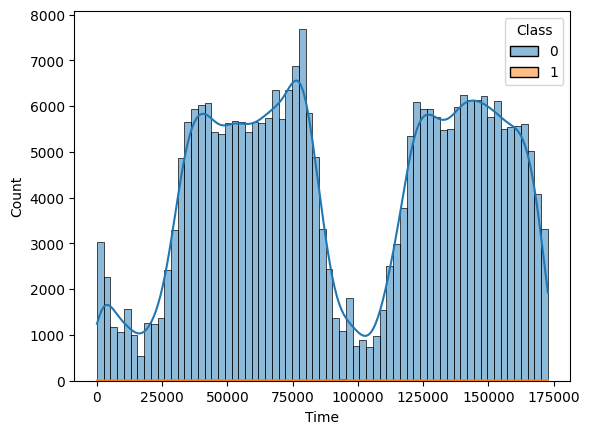

In [25]:
sns.histplot(data=data, x='Time', kde=True, hue='Class')

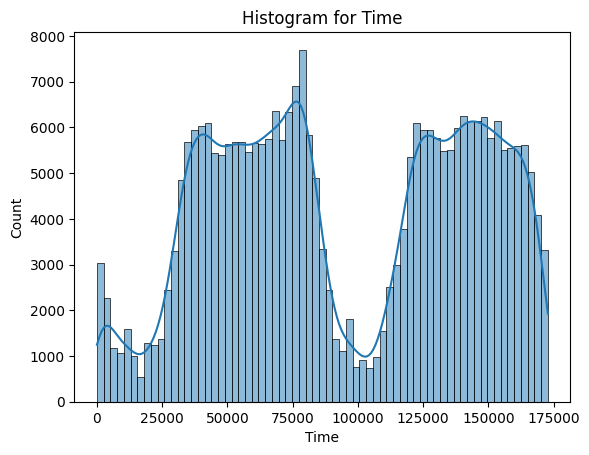

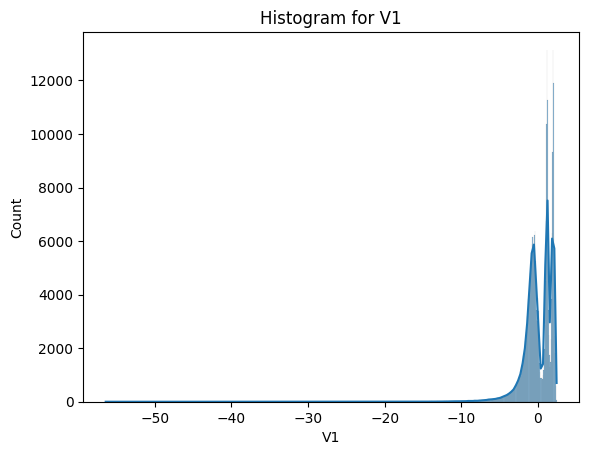

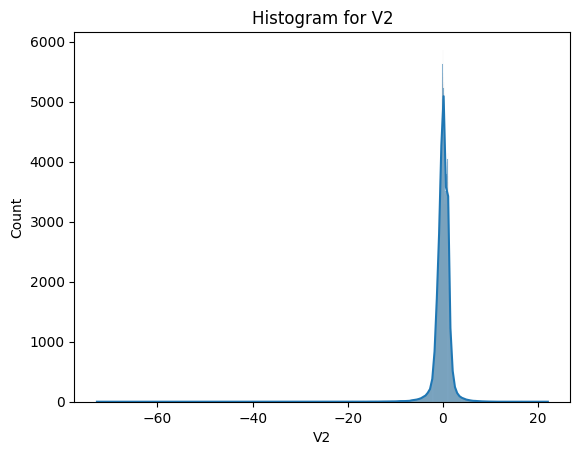

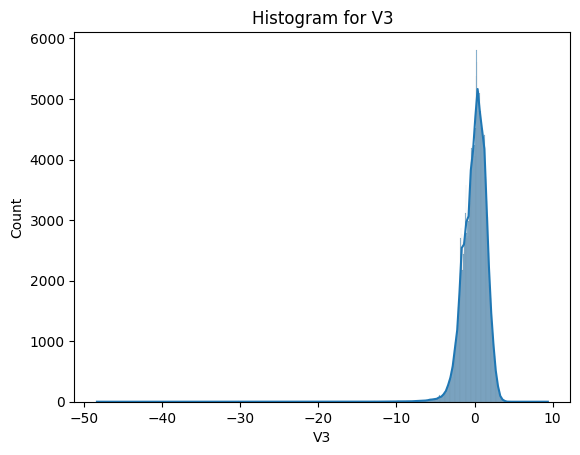

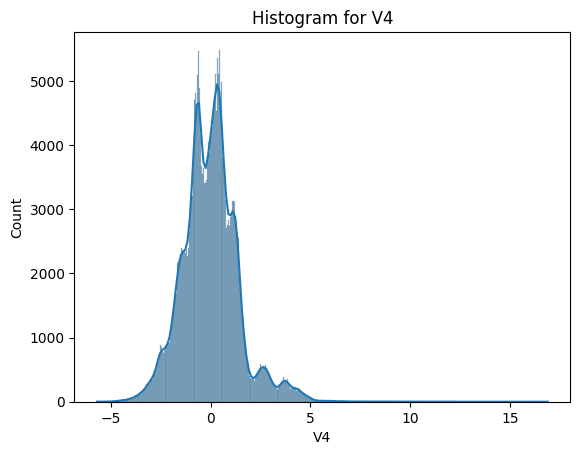

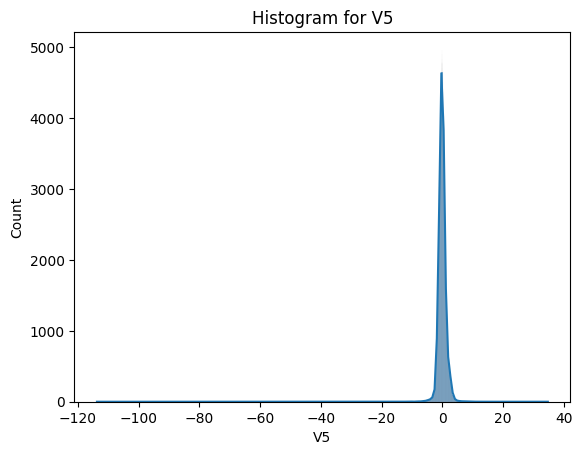

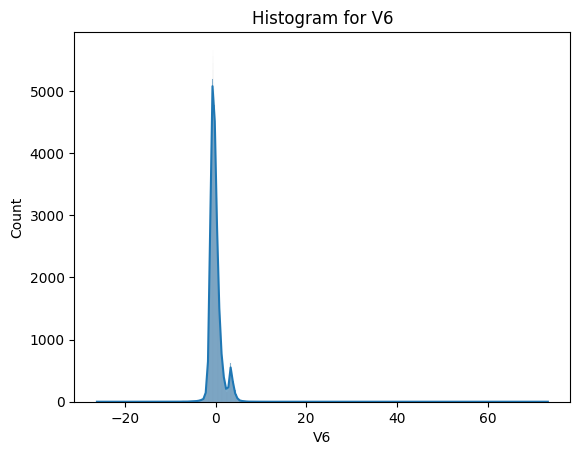

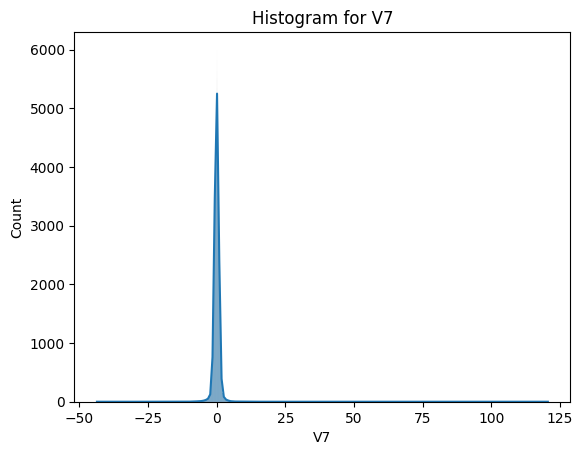

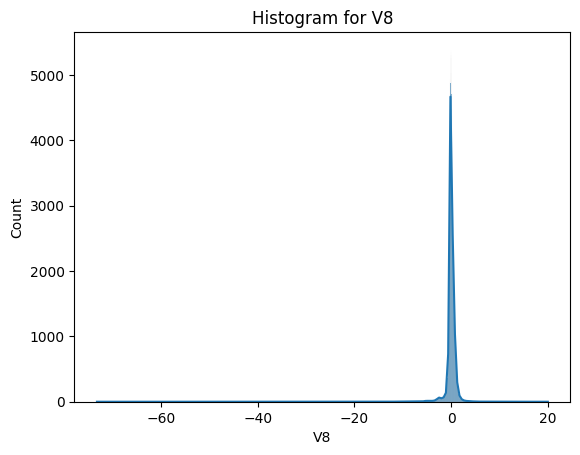

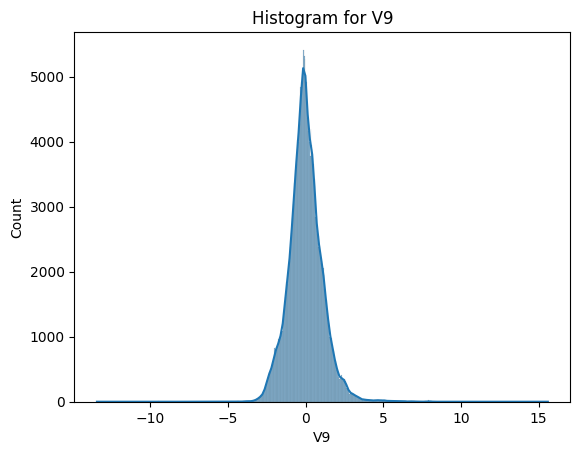

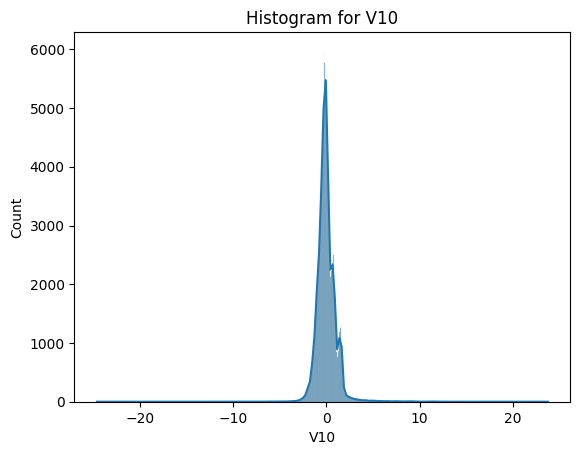

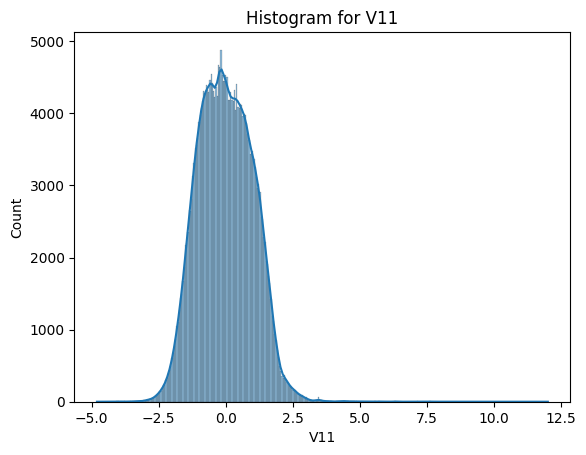

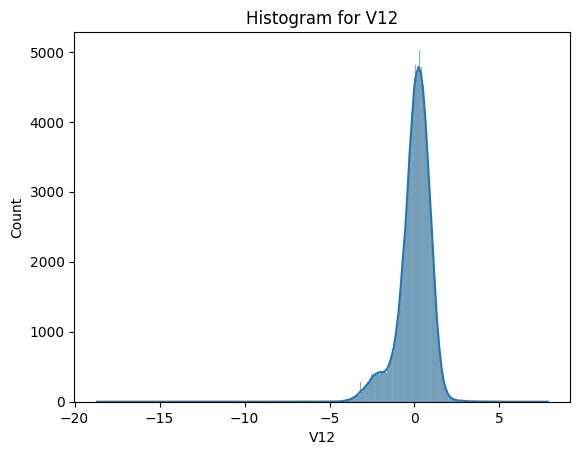

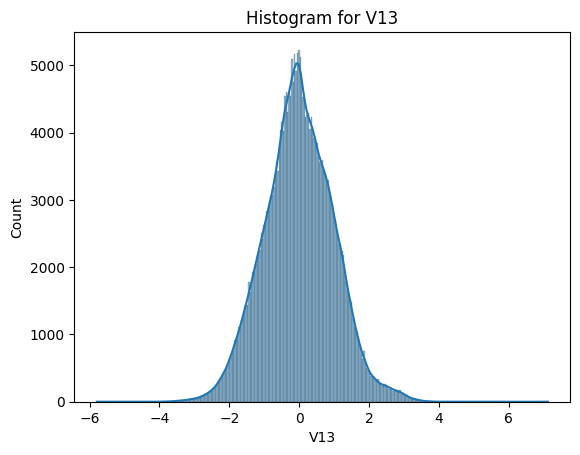

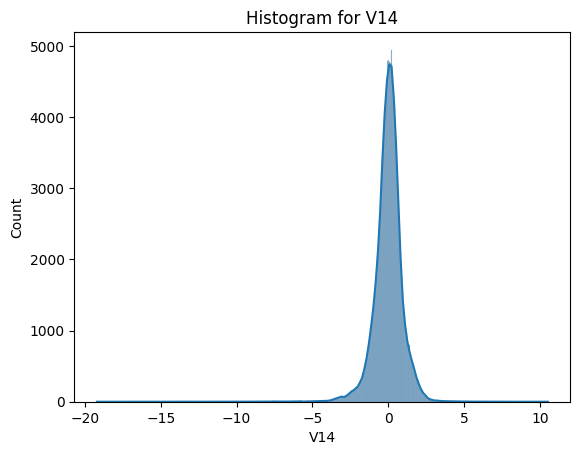

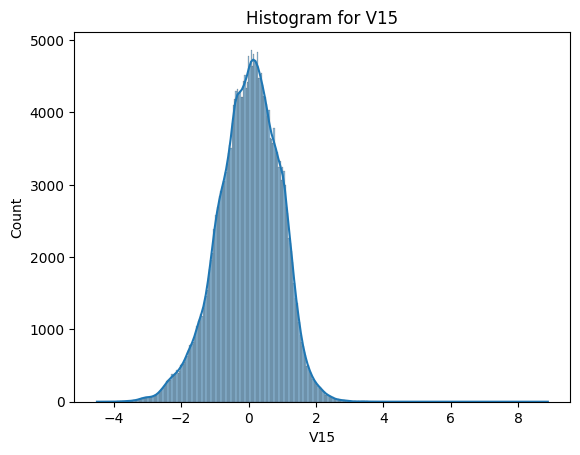

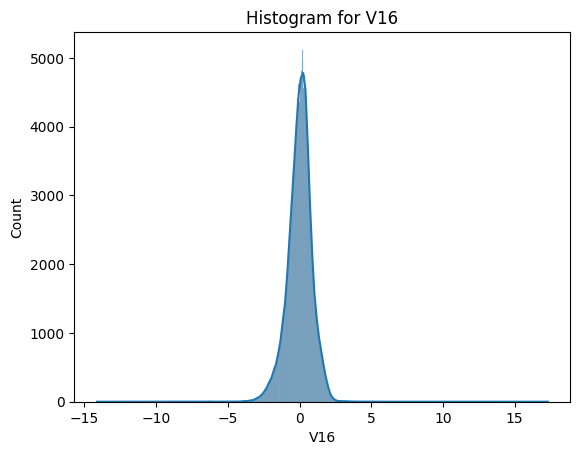

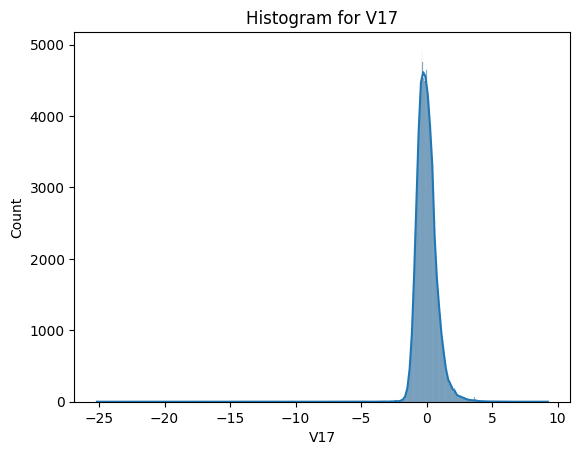

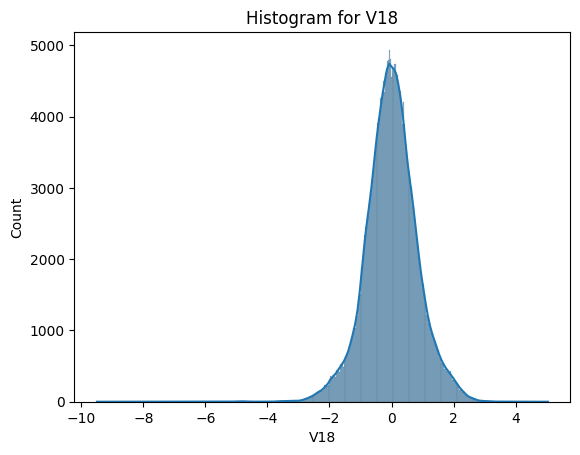

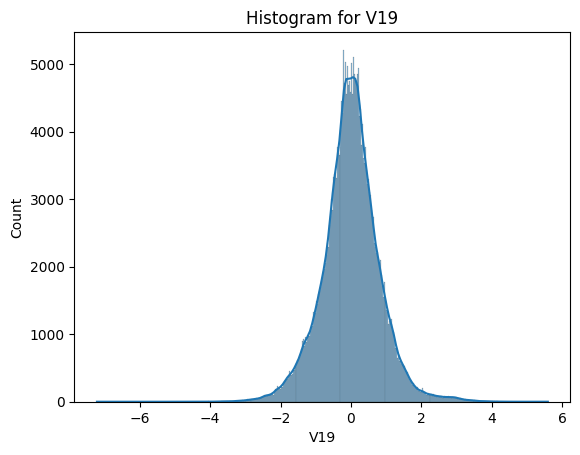

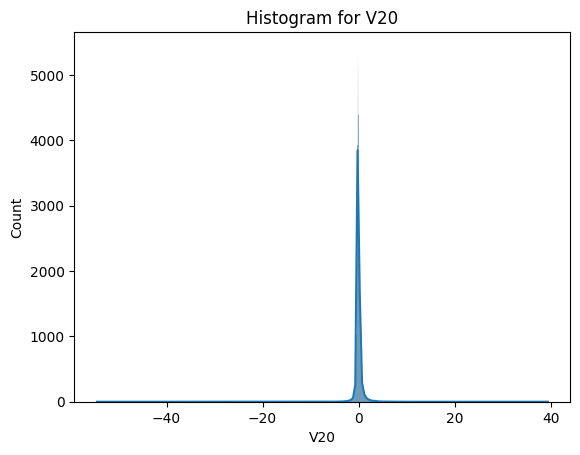

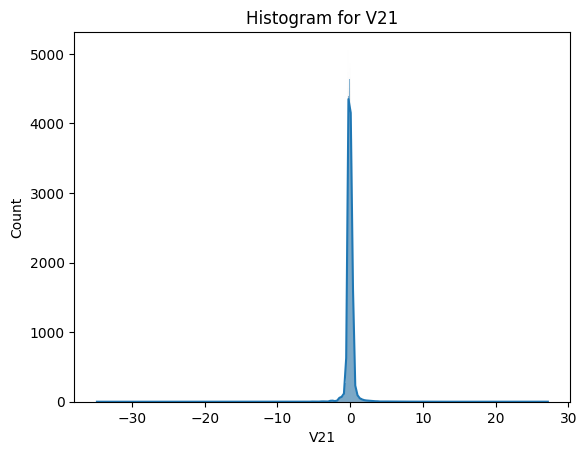

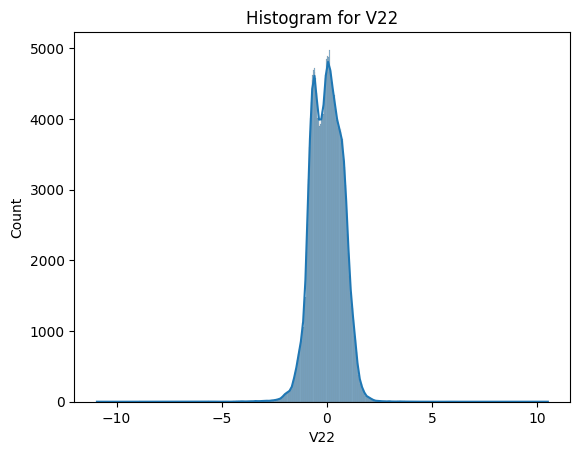

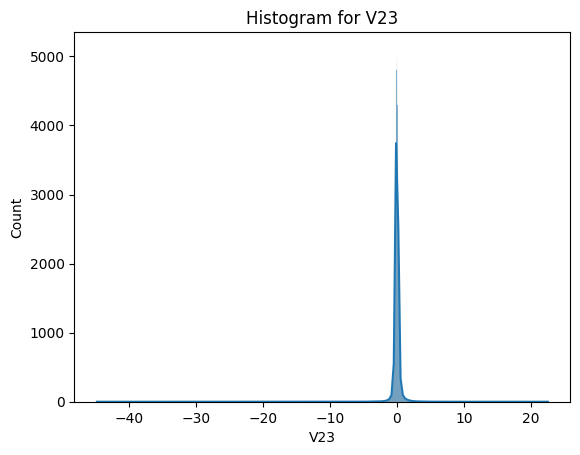

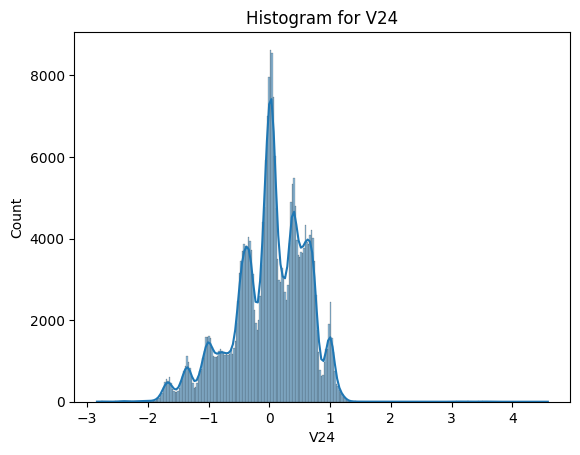

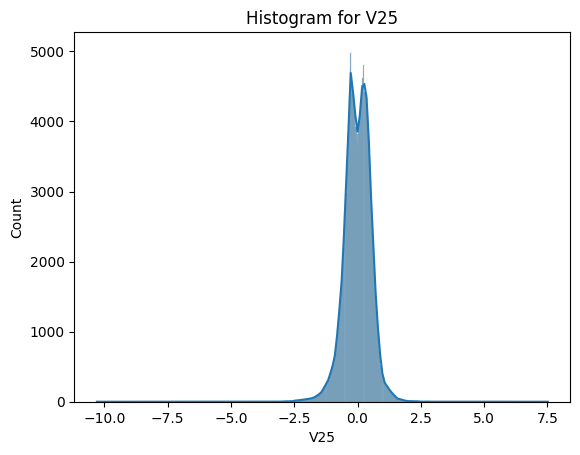

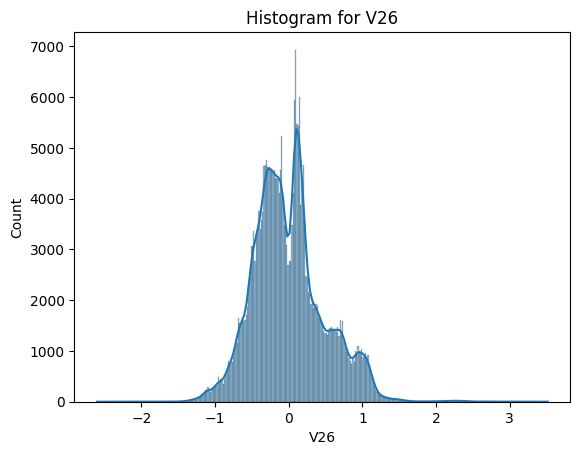

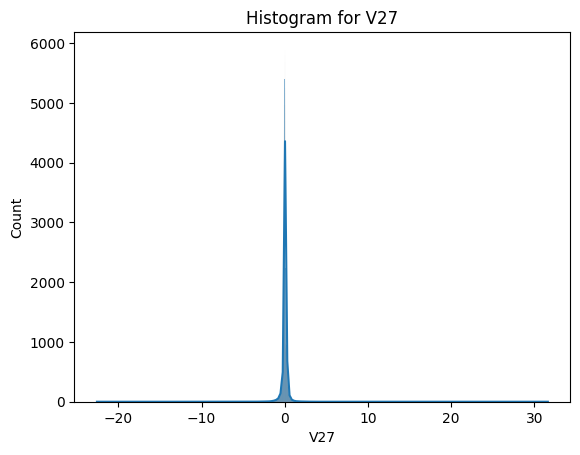

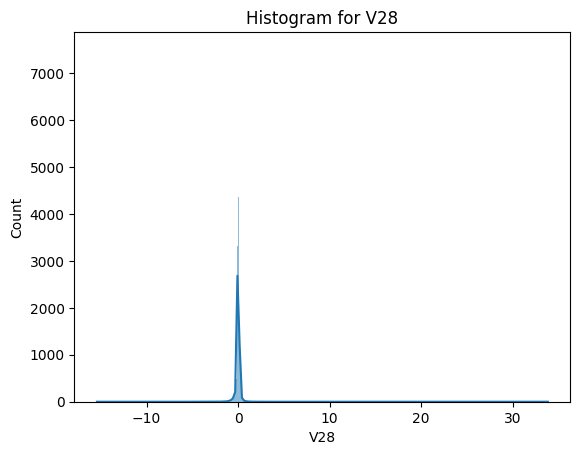

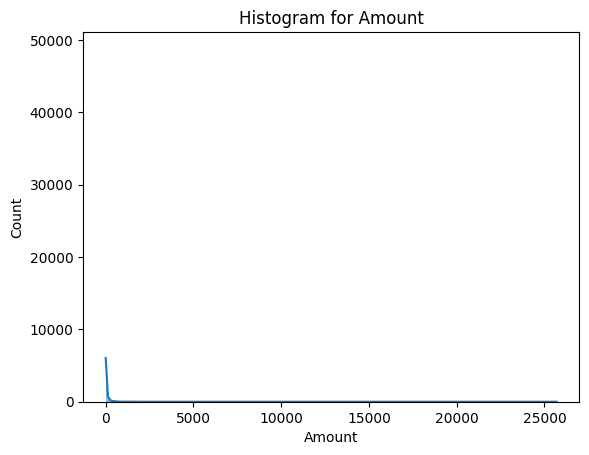

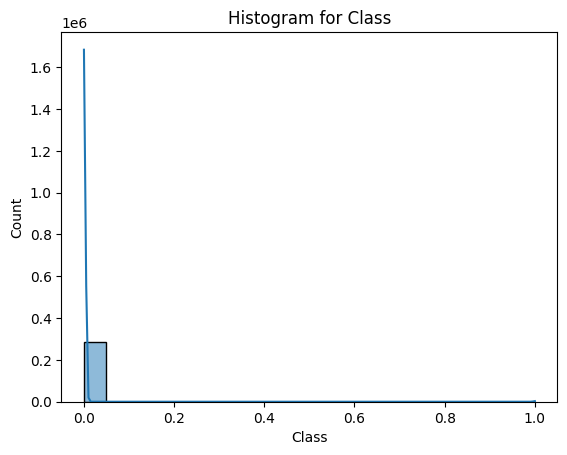

In [7]:
for column in data.columns:
    sns.histplot(data=data, x=column, kde=True, hue='class')
    plt.title(f'Histogram for {column}')
    plt.show()

In [38]:
random_state = 42

In [42]:
X = data_copy.drop('Class', axis=1)

In [43]:
y = data_copy.Class

In [44]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=random_state)

In [45]:
from utils import outlier_detect
from utils import concat_outliers
from utils import ndarray_to_dataframe


outliers = {}

for i in X_train.columns:
    outliers[i] = outlier_detect(X_train, col=i, threshold=5, method='IQR', print_summary=False)

for column, column_outliers in outliers.items():
    outlier_index, param = column_outliers
    print(f'column={column} count outliers={outlier_index.sum()}')

global_outlier_index = concat_outliers(outliers)

print(f'Total outliers count: {global_outlier_index.sum()}')
print(f'Total outliers share: {global_outlier_index.sum()/len(X)}')

column=Time count outliers=544
column=V1 count outliers=492
column=V2 count outliers=1245
column=V3 count outliers=207
column=V4 count outliers=85
column=V5 count outliers=733
column=V6 count outliers=374
column=V7 count outliers=1002
column=V8 count outliers=4777
column=V9 count outliers=134
column=V10 count outliers=1234
column=V11 count outliers=40
column=V12 count outliers=239
column=V13 count outliers=0
column=V14 count outliers=531
column=V15 count outliers=1
column=V16 count outliers=169
column=V17 count outliers=386
column=V18 count outliers=58
column=V19 count outliers=5
column=V20 count outliers=5652
column=V21 count outliers=3375
column=V22 count outliers=30
column=V23 count outliers=3355
column=V24 count outliers=1
column=V25 count outliers=50
column=V26 count outliers=10
column=V27 count outliers=6848
column=V28 count outliers=4980
column=Amount count outliers=9522
Total outliers count: 23145
Total outliers share: 0.08126555878191197


<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Anomaly Detection EDA</p>

!HINT
Обратите внимание на несбаланисированность классов. Попробуйте те методики баланса классов, которые мы с вами прошли (например SMOTE).


### SMOTE Technique (Over-Sampling):
<a id="smote"></a>

<b>SMOTE</b> stands for Synthetic Minority Over-sampling Technique.  Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". <br><br>


<b> Understanding SMOTE: </b>
<ul>
<li> <b> Solving the Class Imbalance: </b> SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class. </li>
<li><b>Location of the synthetic points: </b>   SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points. </li>
<li> <b>Final Effect:  </b> More information is retained since we didn't have to delete any rows unlike in random undersampling.</li>
<li><b> Accuracy || Time Tradeoff: </b> Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.</li>

</ul>

### Cross Validation Overfitting Mistake:
## Overfitting during Cross Validation:
If you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. <b>In the following section you will see amazing precision and recall scores but in reality our data is overfitting!</b>
### The Wrong Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/2639934.jpg?401"><br>

As mentioned previously, if we get the minority class ("Fraud") in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below: <br>


### The Right Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372"> <br>
As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


In [47]:
sm = SMOTE(random_state=random_state)

In [48]:
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [51]:
y_train_over.value_counts()

Class
0    241667
1    241667
Name: count, dtype: int64

In [52]:
from sklearn.preprocessing import RobustScaler

In [53]:
rb = RobustScaler()

In [55]:
X_train = rb.fit_transform(X_train)
X_test = rb.transform(X_test)

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dimensionality Reduction?</p>

In [61]:
from sklearn.decomposition import KernelPCA
import pandas as pd

n_components = X_train.shape[1]
kernel = 'rbf'
gamma = None
n_jobs = -1

kernelPCA = KernelPCA(n_components=X_train_over.shape[1], kernel=kernel, gamma=gamma, n_jobs=n_jobs, random_state=random_state)
kernelPCA.fit(X_train[:10000,:])

X_train_kernel_PCA = kernelPCA.transform(X_train_over)
X_test_kernel_PCA = kernelPCA.transform(X_test)

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KernelPCA was fitted without feature names



In [63]:
X_train_kernel_PCA_24 = X_train_kernel_PCA[:, :24]
X_test_kernel_PCA_24 = X_test_kernel_PCA[:, :24]

[0.15984906 0.0766967  0.05979577 0.05313322 0.05171169 0.0466477
 0.04451052 0.04253639 0.03951623 0.03834044 0.03663353 0.03401816
 0.03330918 0.03106485 0.02974051 0.02725392 0.02693707 0.02458765
 0.02389284 0.02227649 0.01751172 0.0140843  0.01187254 0.01068291
 0.01059973 0.00744025 0.00669152 0.0063463  0.00623053 0.00608827]


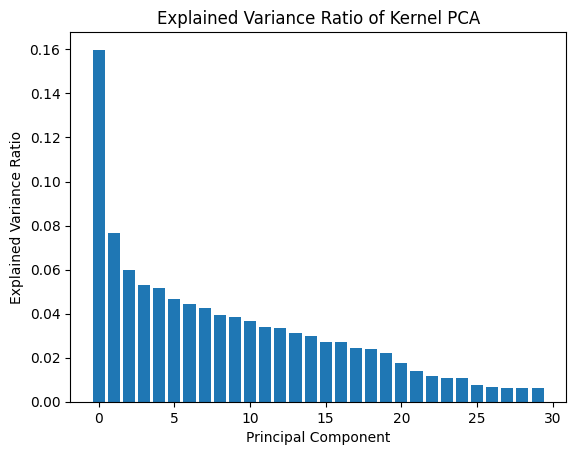

First 24 features explain enough variance for threshold 0.95: 0.9566033994656762


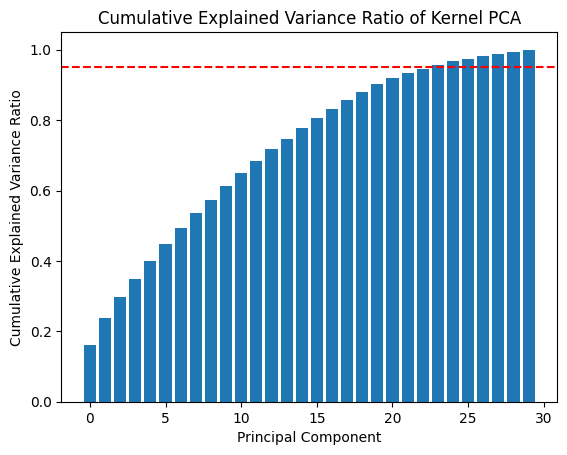

24

In [62]:
import numpy as np

# Compute the eigenvalues of the kernel matrix
eigenvalues = kernelPCA.eigenvalues_

# Compute the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

print(explained_variance_ratio)

plot_explained_variance_ratio(explained_variance_ratio, 'Kernel PCA')
plot_cumulative_explained_variance_ratio(explained_variance_ratio, 'Kernel PCA', 0.95)

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Classification</p>

In [65]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
from utils import basic_model_test
from utils import plot_roc_curve

In [69]:
X_train_kernel_PCA_24.shape

(483334, 24)

In [70]:
X_test_kernel_PCA_24.shape

(42722, 24)

In [71]:
y_train.shape

(242085,)

In [72]:
basic_model_test(
    RandomForestClassifier(n_estimators=100, max_depth=2), 
    X_train_kernel_PCA_24,
    X_test_kernel_PCA_24,
    y_train_over,
    y_test)

ROC AUC:   0.916
Accuracy:  0.959
Precision: 0.034
Recall:    0.824
F1-score:  0.065


<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Testing</p>

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Summary</p>